In [98]:
# Oi prof!
# Não cheguei a implementar a normalização 16x16 no final

# Referências utilizadas:
# https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/#h-what-is-a-feature-descriptor
# https://stackoverflow.com/questions/13082698/rounding-down-integers-to-nearest-multiple

In [99]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [100]:
assignment = cv2.imread("images/TrabalhoHOG.png", 0)

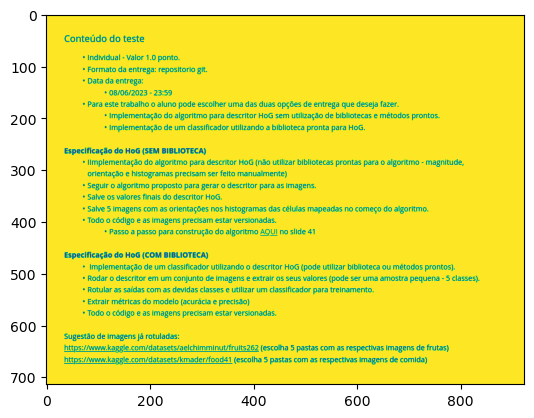

In [101]:
plt.imshow(assignment)

Referência para implementação:
https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/#h-what-is-a-feature-descriptor

In [102]:
HOG_width = 64
HOG_height = 128

img = cv2.imread("images/cat.png", 0)
img = cv2.resize(img, (HOG_width, HOG_height))

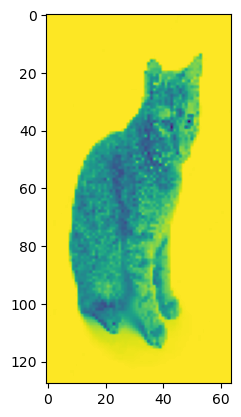

In [103]:
plt.imshow(img)

In [104]:
def get_gradients(img):
  cols = HOG_width
  rows = HOG_height
  size = rows*cols
  gradient_x = np.array([0]*size).reshape(rows, cols)
  gradient_y = np.array([0]*size).reshape(rows, cols)
  
  # gradient_x = [[0 for _ in range(cols)]]*rows
  # gradient_y = [[0 for _ in range(cols)]]*rows
  i = 0
  for col in img:
    j = 0
    for row in col:
      if (i < 1) or (i == rows - 1):
        gradient_x[i][j] = 0
      else:
        gradient_x[i][j] = img[i+1][j] - img[i-1][j]
      
      if (j < 1) or (j == cols - 1):
        gradient_y[i][j] = 0
      else:
        gradient_y[i][j] = img[i][j-1] - img[i][j+1]
        
      j = j+1
    i = i+1
  return gradient_x, gradient_y

In [105]:
gradient_x, gradient_y = get_gradients(img)

/tmp/ipykernel_18232/432733293.py:22: RuntimeWarning: overflow encountered in ubyte_scalars
  gradient_y[i][j] = img[i][j-1] - img[i][j+1]
/tmp/ipykernel_18232/432733293.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
  gradient_x[i][j] = img[i+1][j] - img[i-1][j]


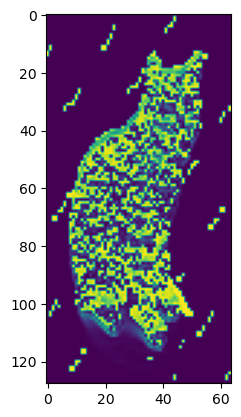

In [106]:
plt.imshow(gradient_x)

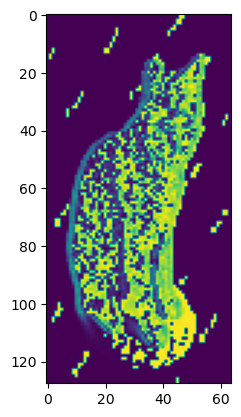

In [107]:
plt.imshow(gradient_y)

In [108]:
def get_total_magnitude(gradient_x, gradient_y):
  cols = HOG_width
  rows = HOG_height
  size = rows*cols
  magnitudes = np.array([0]*size).reshape(rows, cols)
  i = 0
  for col in gradient_x:
    j = 0
    for row in col:
      # sqrt((Gx)**2 + (Gy)**2)
      power_gx = pow(gradient_x[i][j], 2)
      power_gy = pow(gradient_y[i][j], 2)
      magnitude = math.sqrt(power_gx + power_gy)
      # -------------
      magnitudes[i][j] = magnitude
      j = j + 1
    i = i + 1
  return magnitudes


def get_orientation(gradient_x, gradient_y):
  cols = HOG_width
  rows = HOG_height
  size = rows*cols
  orientations = np.array([0]*size).reshape(rows, cols)
  i = 0
  for col in gradient_x:
    j = 0
    for row in col:
      # atan(Gy / Gx)
      orientation = math.atan(gradient_x[i][j] / gradient_y[i][j])
      # -------------
      orientations[i][j] = orientation * (180/math.pi) if not math.isnan(orientation) else 0
      j = j + 1
    i = i + 1
  return orientations

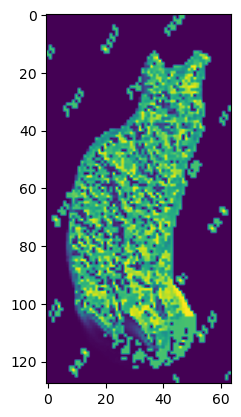

In [109]:
magnitudes = get_total_magnitude(gradient_x, gradient_y)
plt.imshow(magnitudes)

/tmp/ipykernel_18232/2633328225.py:31: RuntimeWarning: invalid value encountered in long_scalars
  orientation = math.atan(gradient_x[i][j] / gradient_y[i][j])
/tmp/ipykernel_18232/2633328225.py:31: RuntimeWarning: divide by zero encountered in long_scalars
  orientation = math.atan(gradient_x[i][j] / gradient_y[i][j])


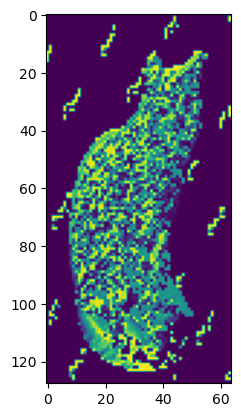

In [110]:
orientations = get_orientation(gradient_x, gradient_y)
plt.imshow(orientations)

In [111]:
# https://stackoverflow.com/questions/13082698/rounding-down-integers-to-nearest-multiple
def round_down(num, divisor):
    return num - (num%divisor)

def get_histograms(img, magnitudes, orientations):
  histograms = []

  for k in range(int(HOG_width / 8)):
    for l in range(int(HOG_height / 8)):

      cols = 8
      rows = 8
      size = rows*cols
      img_block = np.array([0]*size).reshape(rows, cols)

      for x in range(8):
        for y in range(8):
          img_block[x][y] = img[l * x][k * y]

      hist = [0 for i in range(9)]
      i = 0
      for col in img_block:
        j = 0
        for row in col:
          # if 
          m_bin = round_down(orientations[l*i][k*j], 20)
          index = int(m_bin / 9)
          hist[index] += (((m_bin + 20)-orientations[l*i][k*j]) / 20)*magnitudes[l*i][k*j]
          try:
            hist[index + 1] += ((orientations[l*i][k*j] - 20) / 20)*magnitudes[l*i][k*j]
          except:
            pass
          j = j + 1
        i = i + 1
        histograms.append(hist)
  return histograms

In [112]:
histograms = get_histograms(img, magnitudes, orientations)
print(histograms)

[[0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 1020.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 1020.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 1020.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 1020.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 1020.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 1020.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 1020.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 1020.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 4.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 4.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 4.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 4.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0

In [113]:
def hog(img_path, img_name):
  img = cv2.imread(img_path, 0)
  img = cv2.resize(img, (HOG_width, HOG_height))
  cv2.imwrite(f"./{img_name}/{img_name}_resized.bmp", 255 - img)
    
  gradient_x, gradient_y = get_gradients(img)
  cv2.imwrite(f"./{img_name}/{img_name}_gradient_x.bmp", 255 - gradient_x)
  cv2.imwrite(f"./{img_name}/{img_name}_gradient_y.bmp", 255 - gradient_y)
    

  magnitudes = get_total_magnitude(gradient_x, gradient_y)
  cv2.imwrite(f"./{img_name}/{img_name}_magnitudes.bmp", 255 - magnitudes)

  orientations = get_orientation(gradient_x, gradient_y)
  cv2.imwrite(f"./{img_name}/{img_name}_orientations.bmp", 255 - orientations)

  histograms = get_histograms(img, magnitudes, orientations)
  with open(f"./{img_name}/{img_name}_histograms.txt", 'w') as file:
    for hist in histograms:
        file.write("%s\n" % hist)

  return histograms

In [114]:
print(hog("images/cat.png", "cat"))
print(hog("images/milo.png", "milo"))
print(hog("images/ricardo.png", "ricardo"))
print(hog("images/potato.png", "potato"))
print(hog("images/coffee.png", "coffee"))

[[0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 1020.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 1020.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 1020.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 1020.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 1020.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 1020.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 1020.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 1020.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 4.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 4.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 4.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 4.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0

/tmp/ipykernel_18232/432733293.py:22: RuntimeWarning: overflow encountered in ubyte_scalars
  gradient_y[i][j] = img[i][j-1] - img[i][j+1]
/tmp/ipykernel_18232/432733293.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
  gradient_x[i][j] = img[i+1][j] - img[i-1][j]
/tmp/ipykernel_18232/2633328225.py:31: RuntimeWarning: invalid value encountered in long_scalars
  orientation = math.atan(gradient_x[i][j] / gradient_y[i][j])
/tmp/ipykernel_18232/2633328225.py:31: RuntimeWarning: divide by zero encountered in long_scalars
  orientation = math.atan(gradient_x[i][j] / gradient_y[i][j])


[[0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 2052.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 2052.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 2052.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 2052.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 2052.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 2052.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 2052.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 2052.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 1172.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 1172.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 1172.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 1172.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 1172.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 1172.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 1172.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 1172.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 3224.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 3224.0], [0.0, 0.0, 0, 0, 0, 0, 0, 0, 3224.0], [0.0, 0.0, 0,